In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng(2)

In [3]:

df = pd.read_csv('../data/snafu_sample.csv', dtype={'category':'category'})
idlist=df.id.rename('idlist').str.cat(df.listnum.astype(str))
df = df.assign(
    item=df['item']
     .str.replace('aligator', 'alligator')
     .str.replace('^a+rdva+rk', 'aardvark')
     .str.replace('baboob', 'baboon')
     .str.replace('antaloupe', 'antelope'),
    idlist=idlist
)
df=df.set_index([idlist, 'item'], drop=False)
df
# df.set_index(idlist, name='idlist')
# df.query('category=="animals"')['item'].sort_values().unique().tolist()

/tmp/ipykernel_774351/3195993138.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace('^a+rdva+rk', 'aardvark')


id  listnum category           item     rt  RTstart  \
idlist item                                                                   
A1010  strawberry     A101        0   fruits     strawberry  67072    67072   
       kiwi           A101        0   fruits           kiwi      0    67072   
       banana         A101        0   fruits         banana      0    67072   
       pineapple      A101        0   fruits      pineapple      0    67072   
       apple          A101        0   fruits          apple      0    67072   
...                    ...      ...      ...            ...    ...      ...   
C1508  chickenstrips  C150        8    foods  chickenstrips   6909   152000   
       cheeseburger   C150        8    foods   cheeseburger   4269   156269   
       meatloaf       C150        8    foods       meatloaf   6249   162518   
       jumbalaya      C150        8    foods      jumbalaya   5809   168327   
       sausage        C150        8    foods        sausage   9663   177990   

                            group idlist  
idlist item                               
A1010  strawberry     Experiment1  A1010  
       kiwi           Experiment1  A1010  
       banana         Experiment1  A1010  
       pineapple      Experiment1  A1010  
       apple          Experiment1  A1010  
...                           ...    ...  
C1508  chickenstrips  Experiment3  C1508  
       cheeseburger   Experiment3  C1508  
       meatloaf       Experiment3  C1508  
       jumbalaya      Experiment3  C1508  
       sausage        Experiment3  C1508  

[24572 rows x 8 columns]

In [4]:


# idlist=df.id.str.cat(df.listnum.astype(str))
# idlist
animals = (df
#  .assign(idlist=idlist)
#  [df.item.isin((df.item.value_counts()>20).index.tolist())]#index.tolist())]

#  [df.item.isin((df.item.value_counts().pipe(lambda s: s[s>20])).index.tolist())]
 .query('category=="animals"')#[['idlist','item']]
 .assign(animals=1.)['animals']
#  .set_index(['idlist','item'])
 .pipe(lambda df: df[~df.index.duplicated(keep='first')])
 .unstack().fillna(0.)#.drop_levels(0)
 .pipe(lambda df: df.loc[:,df.sum()>50])
)

all_X = animals.values
animals

item,cheetah,lion,hyena,parrot,cat,giraffe,elephant,hippopotamus,monkey,shark,...,chimpanzee,kangaroo,seal,sheep,crocodile,alligator,flamingo,panther,lizard,spider
idlist,,,,,,,,,,,,,,,,,,,,,
A1012,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1015,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1018,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1020,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1023,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C1494,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1496,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1502,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


4

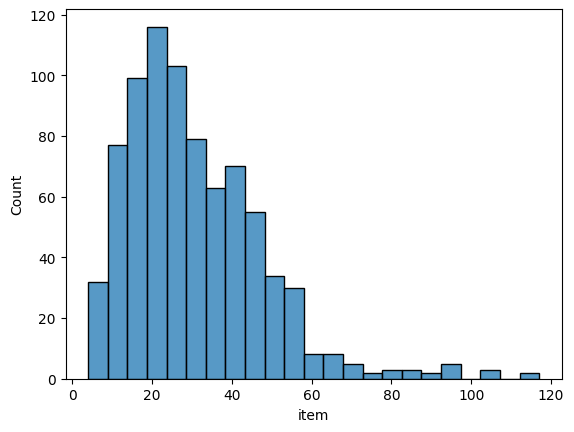

In [5]:
sns.histplot(df.groupby(level=0).item.count())
(df.groupby(level=0).item.count()).min()

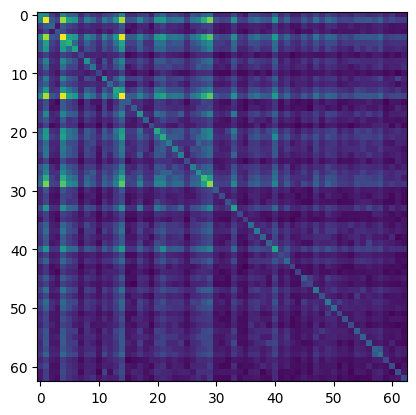

In [6]:
plt.imshow(animals.T@animals)

In [7]:
# sliding_window()
from numpy.lib.stride_tricks import as_strided, sliding_window_view
def arr_cooc(x, n=2):
    # print(x.strides)
    # return as_strided(x, shape=(x.shape[0], n), strides=x.strides*2)
    # print(x.shape)
    return sliding_window_view(x,min(n, x.shape[0]))
# as_strided(df.item.values, shape=(df.length,2), strides=
# (arr_cooc(df.item.values, 3))
# df.groupby(level=0)['item']
animal_occ = (df
#  [df.item.isin(df.item.value_counts(ascending=False).head(100).index.tolist())]
#  [df.item.isin((df.item.value_counts().pipe(lambda s: s[s>20])).index.tolist())]
 .query('category=="animals"')
 .item.astype('category')
)
dummies = np.eye(animal_occ.dtype.categories.shape[0])
roll_X=np.vstack([dummies[arr_cooc(g[1].values, n=10),:].max(axis=1) for g in animal_occ.cat.codes.groupby(level=0)])#[:,]
roll_X = roll_X[:,animal_occ[animal_occ.isin(animals.columns.tolist())].cat.codes.unique()]
# print(animal_occ.cat.codes.sort_values())
# print(animal_cooc.max(axis=0))
# animal_cooc.astype(int).sum(axis=1)
# roll_X=np.array([dummies[ix] for ix in animal_cooc.T])#.sum(axis=1)
# roll_X = roll_X.astype(bool).max(axis=0)
# animal_occ
# animal_occ.cat.codes
# np.eye(animal_occ.dtype.categories.shape[0])[animal_cooc[0]].shape
# animal_occ.cat.codes.unique()
# roll_animals=
# plt.spy(roll_X)
# dummies[arr_cooc(animal_occ.cat.codes.values, n=3)].max(axis=1)#.shape#.shape#max(axis=0)#.sum(axis=0)#.max(axis=0)
roll_X.shape
# animal_occ[animal_occ.isin(animals.columns.tolist())].cat.codes.values

(8124, 63)

<Axes: ylabel='Density'>

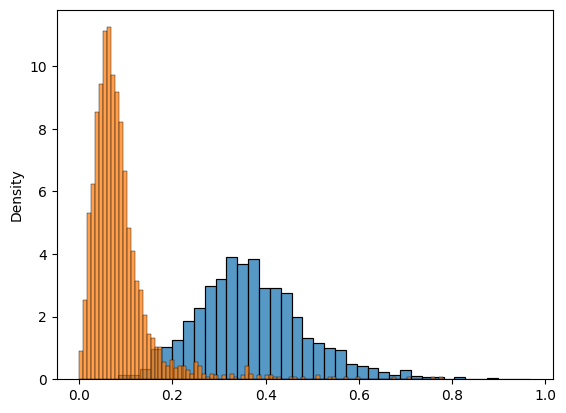

In [8]:
from affinis.associations import ochiai, resource_project, chow_liu, coocur_prob, mutual_information
from affinis.utils import _sq

sns.histplot(_sq(ochiai(all_X, pseudocts=0.5)), stat='density')
sns.histplot(_sq(ochiai(roll_X, pseudocts=0.5)), stat='density')
# sns.displot(_sq(resource_project(X)))

for l: (0)0.000	m: (945)0.011	r:(1891)0.037
 yup, Im good!
for l: (946)0.011	m: (1418)0.015	r:(1891)0.037
 yup, Im good!
for l: (1419)0.015	m: (1655)0.018	r:(1891)0.037
 yup, Im good!
for l: (1656)0.018	m: (1773)0.022	r:(1891)0.037
 yup, Im good!
for l: (1774)0.023	m: (1832)0.026	r:(1891)0.037
 nope, not it fam
for l: (1774)0.023	m: (1803)0.024	r:(1832)0.026
 yup, Im good!
for l: (1804)0.024	m: (1818)0.024	r:(1832)0.026
 nope, not it fam
for l: (1804)0.024	m: (1811)0.024	r:(1818)0.024
 nope, not it fam
for l: (1804)0.024	m: (1807)0.024	r:(1811)0.024
 yup, Im good!
for l: (1808)0.024	m: (1809)0.024	r:(1811)0.024
 nope, not it fam
for l: (1808)0.024	m: (1808)0.024	r:(1809)0.024
 nope, not it fam
exiting at l:1808, r:1808, for value a[l]: 0.023872073282353797


True

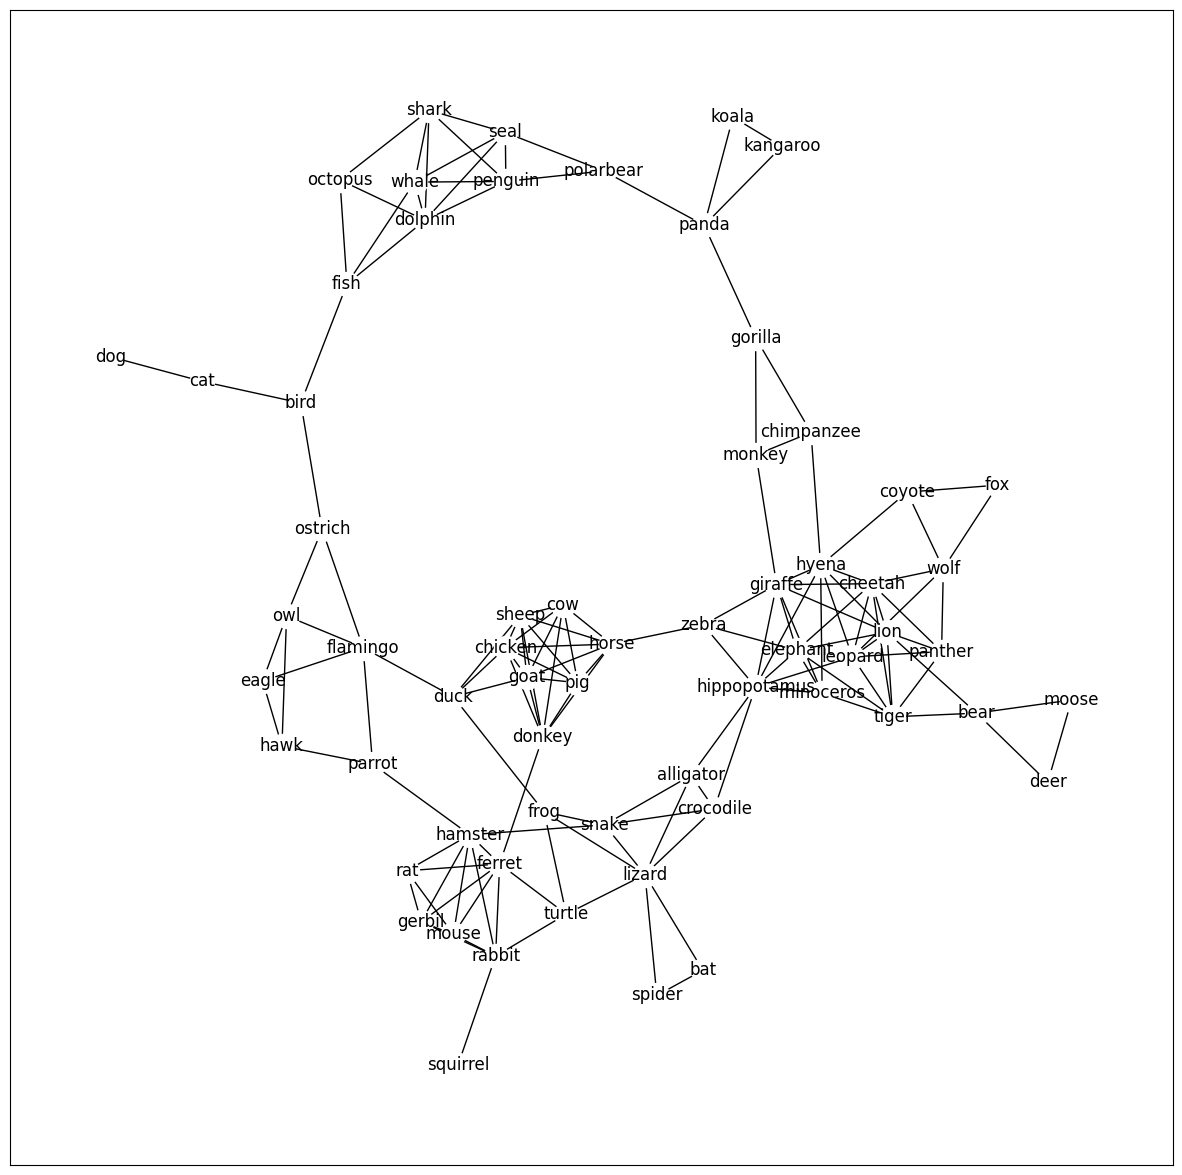

In [9]:
import networkx as nx

from affinis.filter import min_connected_filter
import scipy.sparse as sprs
from affinis.distance import bilinear_dists, generalized_graph_dists
from affinis.proximity import sinkhorn, forest
from affinis.utils import _norm_diag, edge_mask_to_laplacian, _outer

# X = all_X
X = roll_X

def top_tree_pct(x, mult=1):
    pct=np.percentile(_sq(x), 100-100*mult*2/x.shape[0])
    print(pct)
    return x>=pct
plt.figure(figsize=(15,15))
G = nx.from_pandas_adjacency(pd.DataFrame(_sq(~(min_connected_filter(_sq(sinkhorn(ochiai(X)))).mask)), index=animals.columns, columns=animals.columns))
pos_cos = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=pos_cos, node_color='w')
nx.connected.is_connected(G)

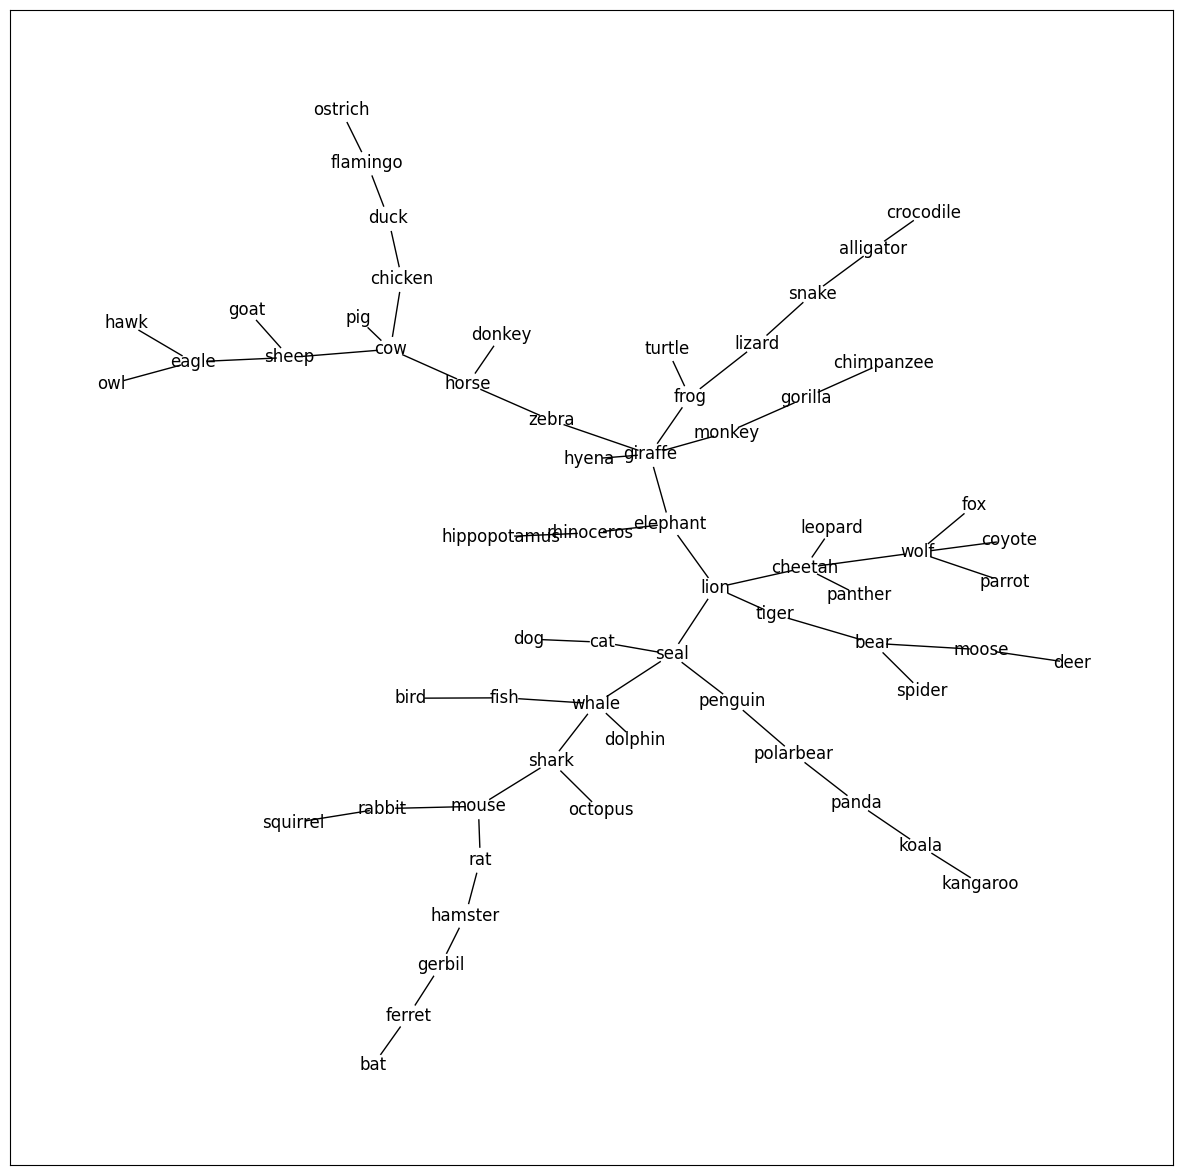

In [10]:
plt.figure(figsize=(15,15))
G = nx.from_pandas_adjacency(pd.DataFrame(chow_liu(X, pseudocts=0.5), index=animals.columns, columns=animals.columns))
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=pos, node_color='w')

In [11]:


def get_mask(e_pmf,idx):
    return sprs.coo_array(_sq(e_pmf)*np.multiply.outer(idx,idx))

def unroll_node_obs(X): 
    trirow, tricol = np.triu_indices(n=X.shape[1],k=1)
    return np.einsum('ij,ik->ijk', X, X)[:,trirow, tricol]

def obs_mask_dists(X,d):
    n = X.shape[0]    
    mask = unroll_node_obs(X)
    return np.ma.masked_array(np.multiply.outer(np.ones(n), _sq(d)), mask=~(mask.astype(bool)))

def masked_subset_mst(x_d):
    A = _sq(x_d.compressed())
    T = sprs.csgraph.minimum_spanning_tree(A).todense()
    x_t = np.zeros_like(x_d)
    x_t[~x_d.mask] = _sq(T)
    return x_t

# est_dists = bilinear_dists(sinkhorn(_norm_diag(coocur_prob(roll_X, pseudocts=0.5))))
# est_dists = bilinear_dists(mutual_information(X, pseudocts=0.5))
est_dists = -np.log(ochiai(X, pseudocts=0.5))

# masked_dists = np.ma.array(np.multiply.outer(np.ones(roll_X.shape[0]), _sq(ochiai(roll_X))), mask=unroll_node_obs(~roll_X.astype(bool)))
masked_dists=obs_mask_dists(X, est_dists)
# masked_subset_mst(masked_dists[0])
# for n,i in enumerate(masked_dists):
#     # print(i.count(), (_sq(np.multiply.outer(roll_X[n], roll_X[n]))).sum(), roll_X[n].sum())
#     print(masked_subset_mst(i)>0)
# _sq(sprs.csgraph.minimum_spanning_tree(_sq(masked_dists[0].compressed())).todense())
# unroll_node_obs(roll_X).shape, np.multiply.outer(np.ones(roll_X.shape[0]), _sq(est_dists)).shape
# masked_dists[1]
# (lambda x: (x,(x**2-x)/2.))(_outer(np.multiply, roll_X[2]).sum())
# (unroll_node_obs(roll_X)[1].astype(bool)).sum()

In [12]:
from affinis.distance import adjusted_forest_dists
# %%timeit
E_obs=sprs.coo_array([
    # masked_subset_mst(i) for i in masked_dists
    _sq(sprs.csgraph.minimum_spanning_tree(
        get_mask(_sq(est_dists),i)
    ).todense()>0) 
    # for i in animals.values
    for i in X
])

add_pmf = (E_obs.sum(axis=0)+0.5)/(E_obs.shape[0]+1)


# mst_post = E_obs.shape[0]*(E_obs.sum(axis=0)+0.5)*_sq(coocur_prob(X, pseudocts=0.5))/(_sq(X.T@X)+1)
evd_L = (E_obs.sum(axis=0)+0.5)/(unroll_node_obs(X).sum(axis=0)+1)

# mst_post = X.shape[1]*(E_obs.sum(axis=0)+0.5)*_sq(coocur_prob(X, pseudocts=0.5))/(_sq(X.T@X)+1)
mst_post = X.shape[0]*evd_L*_sq(coocur_prob(X, pseudocts=0.5))
post_L=evd_L*_sq(adjusted_forest_dists((lambda a: np.diag(a.sum(axis=0))-a)(_sq(evd_L)), beta=100))
# post_L = -_sq(_norm_diag(np.diag(np.sum(_sq(post_L), axis=1))-_sq(post_L)))
post_L

array([0.08613021, 0.04201372, 0.00182488, ..., 0.00398422, 0.07850728,
       0.04743902])

$P(y|x) = \frac{P(Y\bigcap X)}{P(X)}$

$P(x|y) = \frac{P(Y\bigcap X)}{P(Y)}$

so if $X\subset Y$, then $P(Y\bigcap X)=P(X)$ and $P(X|Y) = \frac{P(X)}{P(Y)}$ and 

$P(X) = P(X|Y)P(Y)$

let X be "probability of an interraction" and Y be "probability of a co-occurrence", we can measure that right side via spanning tree bootstraps, to estimate the left. 

Alternatively, if the co-occurrences are treated as rates (say, counts in a poisson or negative binomial), then we are alternatively deriving our estimate as the thinning parameter for each 

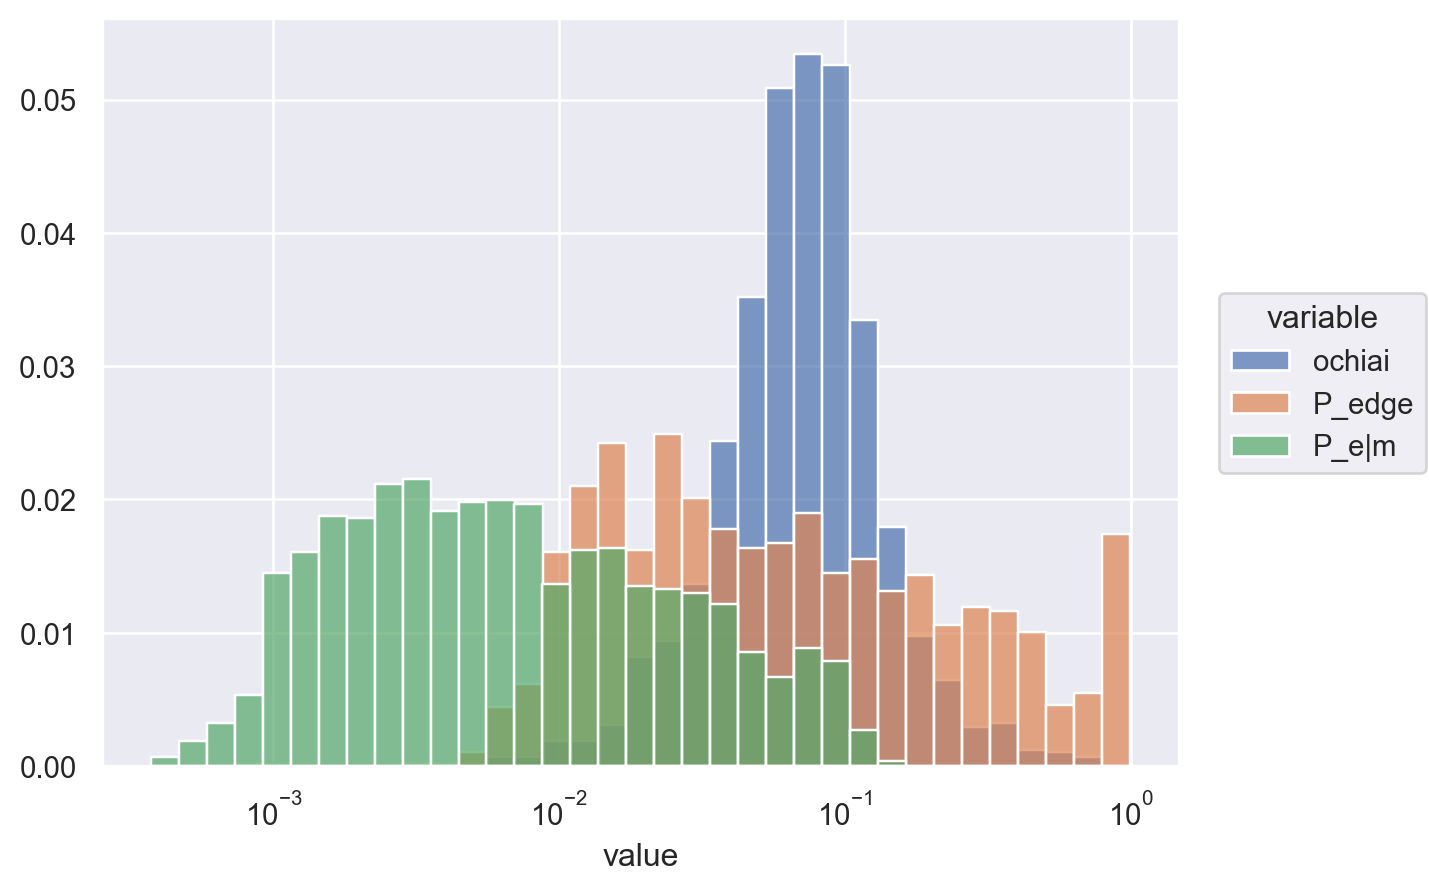

In [13]:
# mst_post/X.shape[1], 
import seaborn.objects as so
from affinis.utils import edge_mask_to_laplacian
# _sq(coocur_prob(X,pseudocts=0.5))*(E_obs.sum(axis=0)+0.5)/(unroll_node_obs(X).sum(axis=0)+1)
# sns.heatmap(_norm_diag((lambda a: np.diag(a.sum(axis=0))-a)(_sq(mst_post))))
# sns.histplot(np.ma.masked_less( -_sq(_norm_diag((lambda a: np.diag(a.sum(axis=0))-a)(_sq(mst_post)))),0.1))
# sns.histplot(mst_post,discrete=True)
# mst_post

# for scores in [
so.Plot(pd.DataFrame({
    'ochiai': _sq(ochiai(X, pseudocts=0.5)),
    'P_edge': evd_L,
    # mst_post,
    'P_e|m': post_L,
}).melt(), x='value', color='variable'
).add(
    so.Bars(), 
    so.Hist(stat='proportion'), 
    # so.Stack() 
).scale(x='log')
# ]:
    # sns.histplot(scores, stat='density', log_scale=True, element='step', fill=False)
    # sns.histplot(np.ma.masked_less(evd_L, 0.01), stat='density', log_scale=True)
# sns.histplot()
# sns.histplot(np.ma.masked_less(post_L, 0.01), stat='density', log_scale=True)
# sns.histplot(_sq(ochiai(X, pseudocts=0.5)), stat='density', log_scale=True)
# sns.histplot(np.ma.masked_less(_sq(_norm_diag(forest(edge_mask_to_laplacian(np.ma.masked_less(evd_L, 0.1)), beta=1))), 0.1), stat='density')

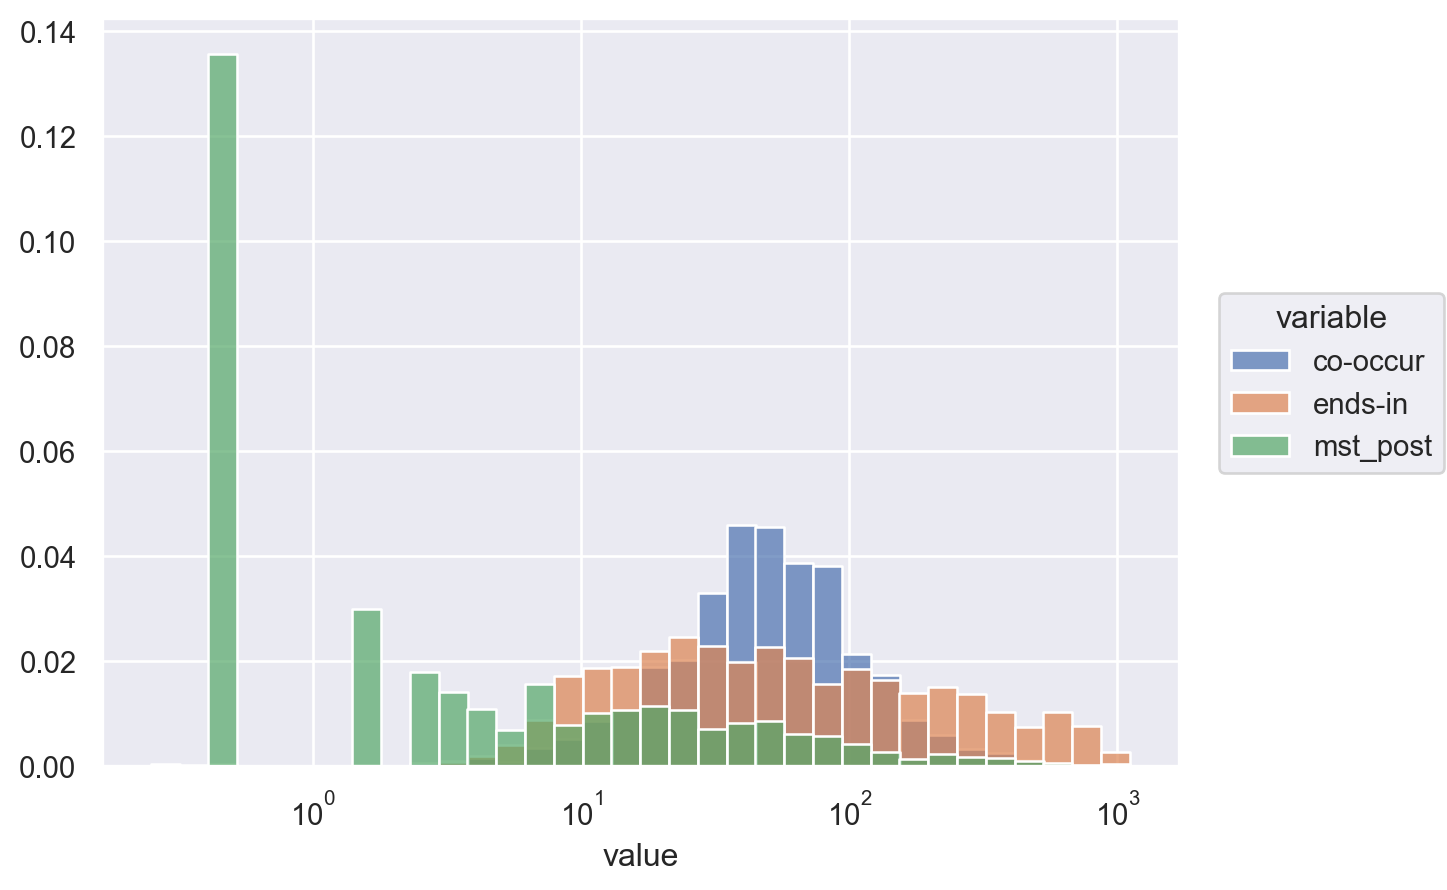

In [14]:
# np.sort(X.shape[0]*post_L)
so.Plot(pd.DataFrame({
    'co-occur': X.shape[0]*_sq(coocur_prob(X, pseudocts=0.5)),
    'ends-in': X.shape[0]*post_L,
    'mst_post': mst_post,
    # 'same-tree': X.shape[0]*_sq(_norm_diag(forest((lambda a: np.diag(a.sum(axis=0))-a)(_sq(evd_L)), beta=1))),
}).melt(), x='value', color='variable'
).add(
    so.Bars(), 
    so.Hist(stat='proportion'), 
    # so.Stack() 
).scale(x='log')

# sns.histplot(_sq(X.T@X), log_scale=True)
# sns.histplot(X.shape[0]*post_L, log_scale=True, fill=False)
# sns.histplot(X.shape[0]*_sq(_norm_diag(forest((lambda a: np.diag(a.sum(axis=0))-a)(_sq(evd_L)), beta=5))))

/home/tbsexton/.pyenv/versions/miniforge3/envs/affinis/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


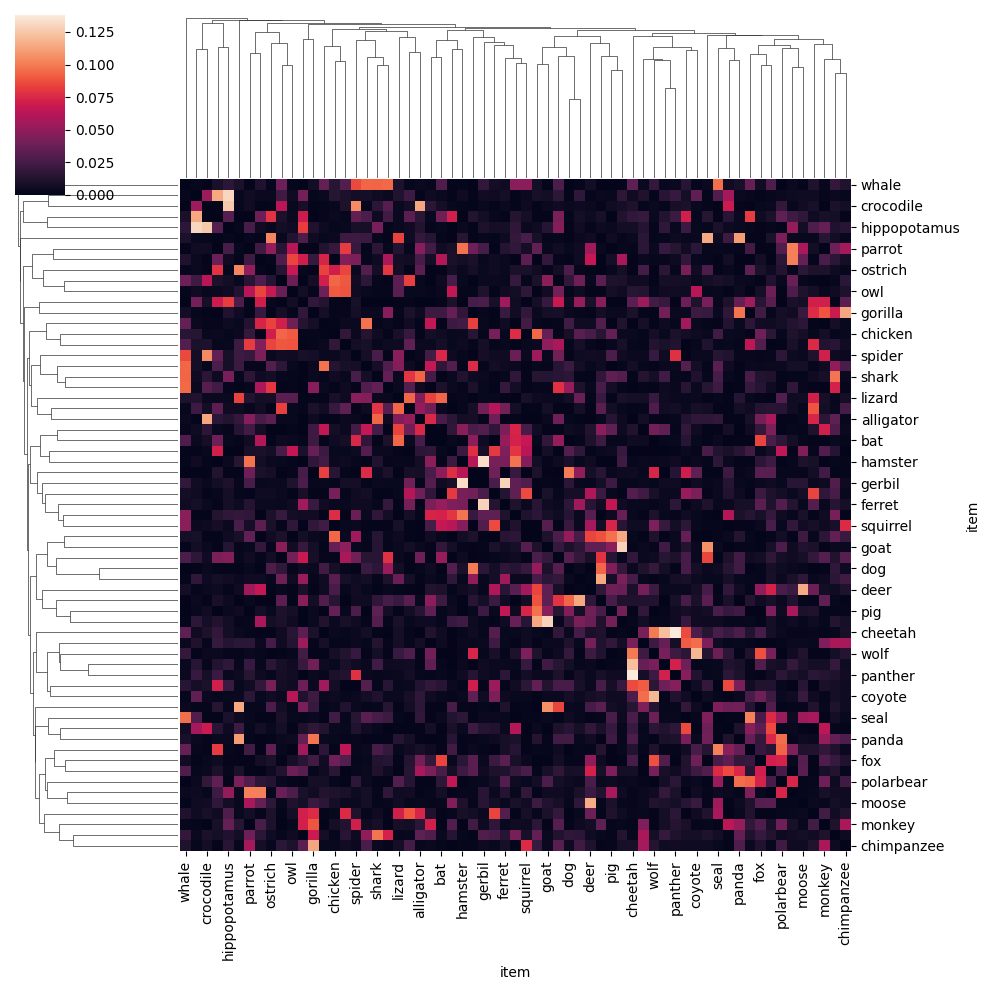

In [15]:
sns.clustermap(pd.DataFrame(_sq(post_L), columns=animals.columns, index=animals.columns))
# sns.heatmap(_norm_diag(1-forest(edge_mask_to_laplacian(np.ma.masked_less(evd_L, 0.1)), beta=1)))
# sns.heatmap(forest(edge_mask_to_laplacian(np.ma.masked_less(evd_L, 0.1)), beta=1)/np.sqrt(1-_outer(np.multiply, 1-np.diag(forest(edge_mask_to_laplacian(np.ma.masked_less(evd_L, 0.1)), beta=1)))))

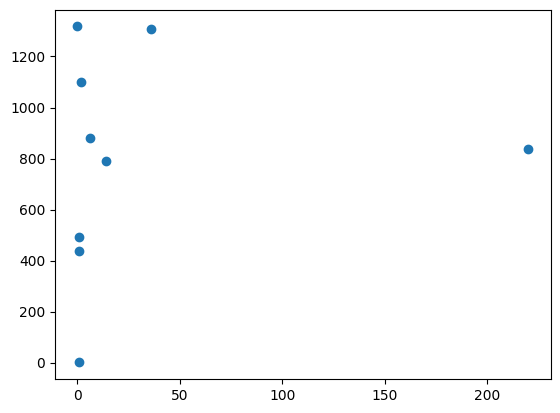

In [16]:
import scipy.stats as ss
# ss.rv_histogram(
cts,vals=np.histogram(unroll_node_obs(X).sum(axis=0), density=False, 
# bins=np.arange(unroll_node_obs(X).sum(axis=0).max())
)

plt.plot(cts[1:], robbins_cooc:=((vals[1:-1]+1)*cts[:-1]+0.5)/(cts[1:]+1), ls='', marker='o') #robbins estimate
    # , density=False).pdf(range(1000))

cts,vals=np.histogram(E_obs.sum(axis=0), density=False, 
# bins=np.arange(E_obs.sum(axis=0).max())
)
# plt.plot(cts[1:], robbins_intr:=((vals[1:-1]+1)*cts[:-1]+0.5)/(cts[1:]+1), ls='', marker='o') #robbins estimate
# plt.yscale('log')


In [17]:
plt.plot(robbins_intr[1:]/robbins_cooc[1:])
robbins_intr

NameError: name 'robbins_intr' is not defined

(7.0, 0.008350344367879032)

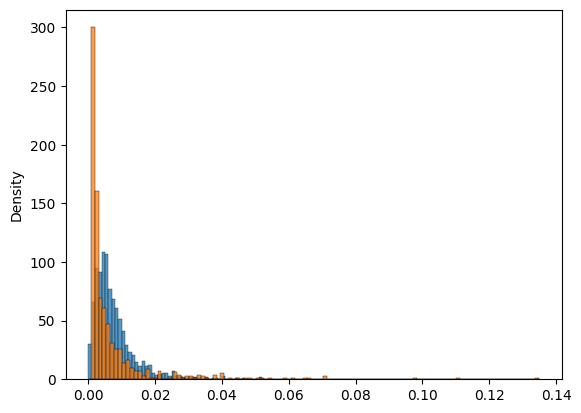

In [18]:
from scipy.stats import poisson, nbinom, dirichlet
from scipy.special import lambertw

# _sq(1-poisson(mst_post).pmf(0))/forest(_norm_diag((lambda a: np.diag(a.sum(axis=0))-a)(_sq(mst_post))), beta=10)

# m = X.shape[1]*(E_obs.sum(axis=0)+0.5)/_sq(X.T@X+1)
# m = E_obs.sum(axis=0)/np.ma.masked_less(_sq(X.T@X),1)
# s = m/((E_obs>0).sum(axis=0)/np.ma.masked_less(_sq(X.T@X), 1))
# lam = (lambda s: lambertw(-s*np.exp(-s))+s)(s)
# 1-s/np.real(lam)   
# s, lam

# lambertw(-mst_post*np.exp(-mst_post))+mst_post
# mst_post
# E_obs.mean(axis=0)/E_obs.nonzero().mean(axis=0)
# (E_obs>0).mean(axis=0)
# m/((E_obs>0).sum(axis=0)/np.ma.masked_less(_sq(X.T@X), 1))
# np.real(lam)
# m
E_obs_ma = np.ma.masked_array(E_obs.todense(), mask=~(unroll_node_obs(X).astype(bool)))

bss = poisson(1).rvs((E_obs.shape[0], 1000))
m = (poisson(1).rvs((E_obs.shape[0], 1000)).sum(axis=1)*E_obs_ma.T).T.mean(axis=0)/1000
s = m/(m>0).sum(axis=0)
lam = (lambda s: lambertw(-s*np.exp(-s))+s)(s)
# 1-s/np.real(lam)   
# sns.histplot(np.real(lam))
sns.histplot(unroll_node_obs(X).sum(axis=0)/X.shape[0], stat='density')
sns.histplot(E_obs.sum(axis=0)[E_obs.sum(axis=0)>5]/X.shape[0], stat='density')
# plt.plot(poisson(unroll_node_obs(X).sum(axis=0).mean()/X.shape[0]).pmf(np.arange(200)))
# plt.plot(nbinom(7, 0.5).pmf(np.arange(50)), color='r')
# sns.histplot(E_obs.sum(axis=0)[E_obs.sum(axis=0)>0], stat='probability', discrete=True)
# lam

# sns.histplot(nbinom(4, 0.1).mean(axis=0)>0], stat='probability', discrete=True)
# lam

nbinom(7, 0.5).mean(), unroll_node_obs(X).sum(axis=0).mean()/X.shape[0]
# m
# sns.histplot((E_obs.sum(axis=0)+0.5)/(unroll_node_obs(X).sum(axis=0)+1), stat='density')
# (unroll_node_obs(X).astype(bool)).shape, E_obs.shape
# plt.yscale('log')



In [19]:
# sns.histplot(_sq(ochiai(X.shape[0]*dirichlet(4*np.ones(X.shape[0])).rvs().T*X))
ochiai(rng.choice(X, axis=0, size=1000, p=dirichlet(4*np.ones(X.shape[0])).rvs()[0]), pseudocts=0.5)
# dirichlet(4*np.ones(X.shape[0])).rvs()[0]

# ochiai(X)

array([[1.        , 0.38665318, 0.18556062, ..., 0.3593947 , 0.04387863,
        0.06933956],
       [0.38665318, 1.        , 0.18883349, ..., 0.30608464, 0.0480624 ,
        0.07722765],
       [0.18556062, 0.18883349, 1.        , ..., 0.07357234, 0.07239902,
        0.04794065],
       ...,
       [0.3593947 , 0.30608464, 0.07357234, ..., 1.        , 0.02774387,
        0.11814373],
       [0.04387863, 0.0480624 , 0.07239902, ..., 0.02774387, 1.        ,
        0.04734191],
       [0.06933956, 0.07722765, 0.04794065, ..., 0.11814373, 0.04734191,
        1.        ]])

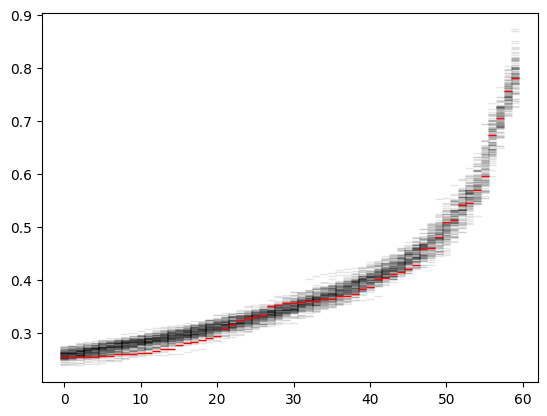

In [20]:
for i in range(100):
    plt.plot(np.sort(_sq(
        ochiai(rng.choice(X, axis=0, size=1000, p=dirichlet(4*np.ones(X.shape[0])).rvs()[0]), pseudocts=0.5)
        ))[-60:], 
        marker='_', ls='', color='k', alpha=0.1
    )
plt.plot(np.sort(_sq(ochiai(X, pseudocts=0.5)))[-60:], marker='_', ls='', color='r')

<Axes: >

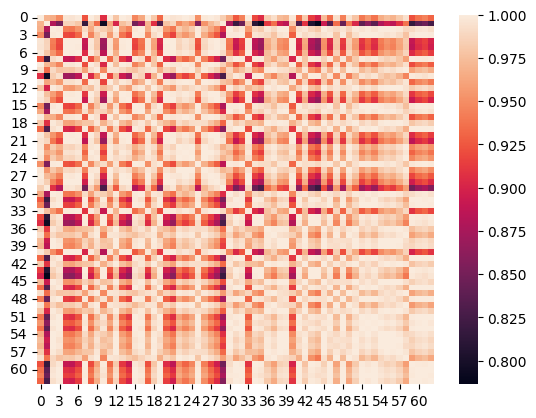

In [21]:
# from affinis.plots import hinton
from affinis.utils import minmax
from affinis.associations import _contingency_prob

a,b,c,d = _contingency_prob(X, pseudocts=0.5)

d/b, d/c, a.shape
# sns.heatmap(1/_outer(np.add, 1/X.sum(axis=0)))
# sns.heatmap(sinkhorn(_sq(post_L)))
# sns.histplot(post_L)
# sns.histplot(minmax(_sq(sinkhorn(_sq(post_L)))))
sns.heatmap((1/_outer(np.add, 1/X.sum(axis=0)))/(np.sqrt(_outer(np.multiply, X.sum(axis=0)))/2))

<Axes: >

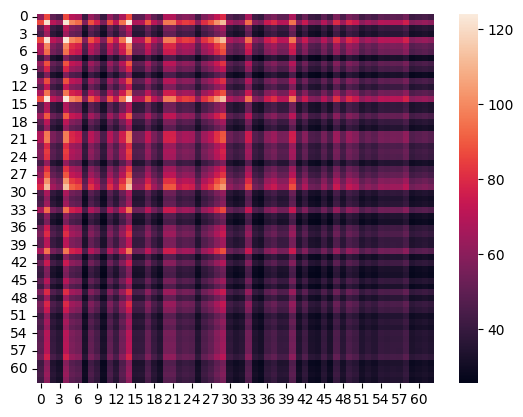

In [195]:
sns.heatmap(np.sqrt(_outer(np.multiply, X.sum(axis=0)))/2)

In [198]:
# sns.histplot(post_L, stat='density')
# sns.histplot(np.where(mst_post>0.1, mst_post, np.nan), stat='density')
# _sq(mst_post).shape
# plt.xscale('log')
# mst_post

<Axes: ylabel='Count'>

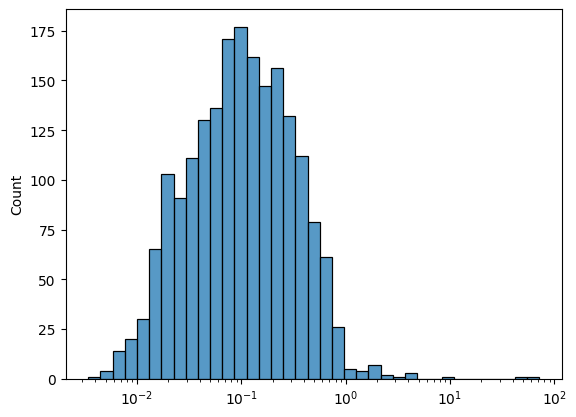

In [22]:
sns.histplot(post_L/_sq(ochiai(X, pseudocts=0.5)), log_scale=True)

for l: (0)0.004	m: (945)0.050	r:(1891)0.995
 yup, Im good!
for l: (946)0.050	m: (1418)0.150	r:(1891)0.995
 yup, Im good!
for l: (1419)0.151	m: (1655)0.313	r:(1891)0.995
 yup, Im good!
for l: (1656)0.315	m: (1773)0.471	r:(1891)0.995
 yup, Im good!
for l: (1774)0.472	m: (1832)0.700	r:(1891)0.995
 yup, Im good!
for l: (1833)0.713	m: (1862)0.850	r:(1891)0.995
 yup, Im good!
for l: (1863)0.852	m: (1877)0.955	r:(1891)0.995
 yup, Im good!
for l: (1878)0.957	m: (1884)0.993	r:(1891)0.995
 yup, Im good!
for l: (1885)0.993	m: (1888)0.994	r:(1891)0.995
 nope, not it fam
for l: (1885)0.993	m: (1886)0.993	r:(1888)0.994
 yup, Im good!
for l: (1887)0.994	m: (1887)0.994	r:(1888)0.994
 nope, not it fam
exiting at l:1887, r:1887, for value a[l]: 0.9935897435897436


True

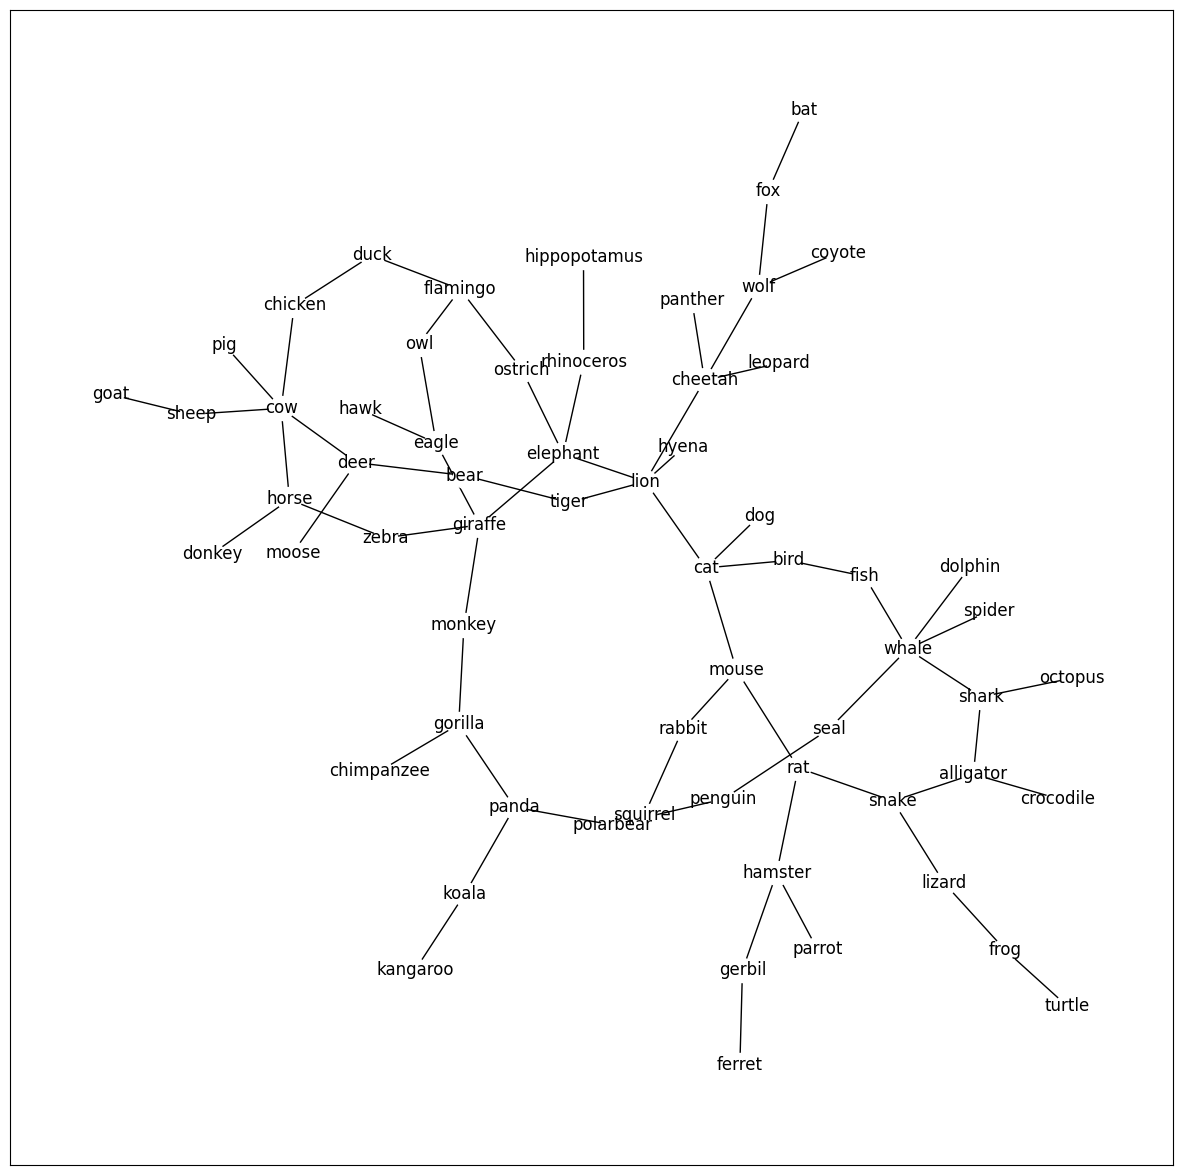

In [23]:
plt.figure(figsize=(15,15))

# G = nx.from_pandas_adjacency(pd.DataFrame((minmax(sinkhorn(_sq(post_L)))>0.7).astype(int), index=animals.columns, columns=animals.columns))
# G = nx.from_pandas_adjacency(pd.DataFrame(_sq(_sq(top_tree_pct(_sq(post_L), mult=1.5))), index=animals.columns, columns=animals.columns))

G = nx.from_pandas_adjacency(pd.DataFrame(_sq(~min_connected_filter(_sq(Gvals:=(_sq(evd_L)))).mask), index=animals.columns, columns=animals.columns))
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=pos, node_color='w')
# plt.savefig('animals.svg')
list(G.neighbors('spider'))
nx.connected.is_connected(G)

for l: (0)0.000	m: (945)0.006	r:(1891)0.084
 yup, Im good!
for l: (946)0.006	m: (1418)0.016	r:(1891)0.084
 yup, Im good!
for l: (1419)0.016	m: (1655)0.032	r:(1891)0.084
 yup, Im good!
for l: (1656)0.032	m: (1773)0.047	r:(1891)0.084
 yup, Im good!
for l: (1774)0.047	m: (1832)0.066	r:(1891)0.084
 yup, Im good!
for l: (1833)0.066	m: (1862)0.074	r:(1891)0.084
 yup, Im good!
for l: (1863)0.074	m: (1877)0.079	r:(1891)0.084
 yup, Im good!
for l: (1878)0.079	m: (1884)0.082	r:(1891)0.084
 nope, not it fam
for l: (1878)0.079	m: (1881)0.080	r:(1884)0.082
 yup, Im good!
for l: (1882)0.081	m: (1883)0.082	r:(1884)0.082
 nope, not it fam
for l: (1882)0.081	m: (1882)0.081	r:(1883)0.082
 yup, Im good!
exiting at l:1883, r:1883, for value a[l]: 0.08164865534200443


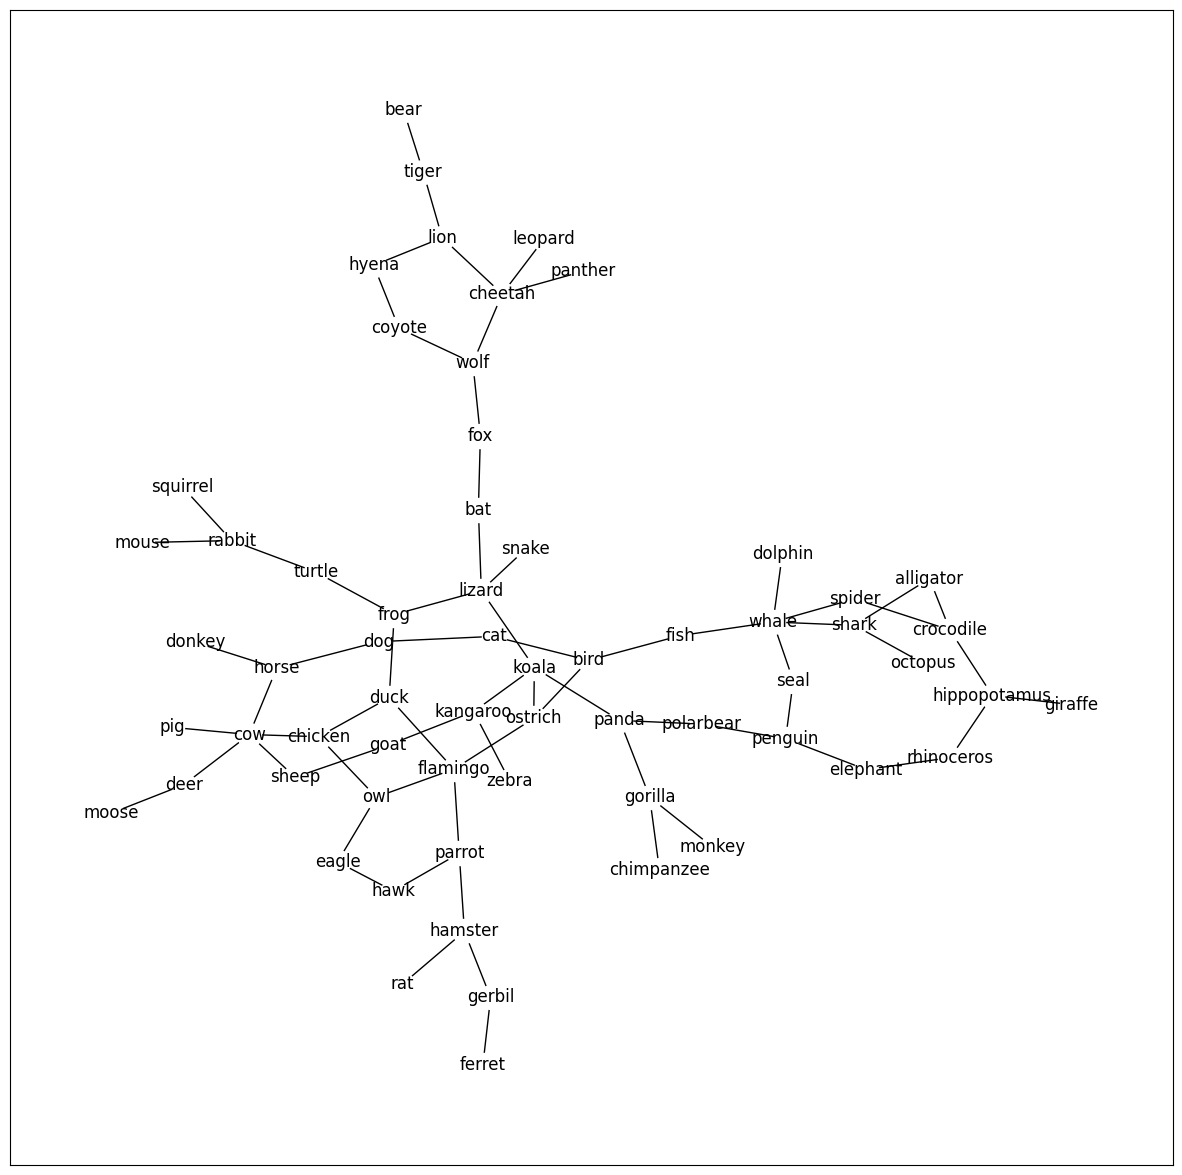

In [25]:
# sns.displot(mst_post)
# _sq(mst_post>0.1)
plt.figure(figsize=(15,15))

# G = nx.from_pandas_adjacency(pd.DataFrame((minmax(sinkhorn(_sq(post_L)))>0.7).astype(int), index=animals.columns, columns=animals.columns))
# G = nx.from_pandas_adjacency(pd.DataFrame(_sq(_sq(top_tree_pct(_sq(post_L), mult=1.5))), index=animals.columns, columns=animals.columns))

G = nx.from_pandas_adjacency(pd.DataFrame(_sq(~min_connected_filter(_sq(Gvals:=(_sq(post_L)))).mask), index=animals.columns, columns=animals.columns))
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=pos, node_color='w')
# nx.draw_networkx_edges(G, pos=pos, edge_cmap='viridis')

In [70]:
from affinis.utils import _outer
def unroll_node_obs(X): 
    trirow, tricol = np.triu_indices(n=X.shape[1],k=1)
    return np.einsum('ij,ik->ijk', X, X)[:,trirow, tricol]
    
np.ma.array(np.multiply.outer(np.ones(roll_X.shape[0]), _sq(ochiai(roll_X))), mask=unroll_node_obs(~roll_X.astype(bool)))
# x_mask= np.ma.masked_less(X[0], 1e-3)
# x_umsk= X[0]
# %timeit _outer(np.multiply,x_mask.compressed())
# %timeit _outer(np.multiply, x_umsk)
# x_mask.

# unroll_node_obs(roll_X)[0].sum()
# np.ma.masked_array(X.astype(bool))

masked_array(
  data=[[0.4041131639512283, 0.19126619880413012, 0.03729338685741352,
         ..., --, --, --],
        [0.4041131639512283, 0.19126619880413012, 0.03729338685741352,
         ..., --, --, --],
        [--, 0.19126619880413012, 0.03729338685741352, ..., --, --, --],
        ...,
        [--, --, --, ..., --, 0.08396582362889815, 0.09865439165731539],
        [--, --, --, ..., --, 0.08396582362889815, 0.09865439165731539],
        [--, --, --, ..., 0.03819946356901707, 0.08396582362889815,
         0.09865439165731539]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [ True, False, False, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True, False, False],
        [ True,  True,  True, ...,  True, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=1e+20)

In [124]:
minimum_spanning_tree(-_sq(mst_post)).todense()<0

matrix([[False,  True, False, ...,  True, False, False],
        [False, False,  True, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])

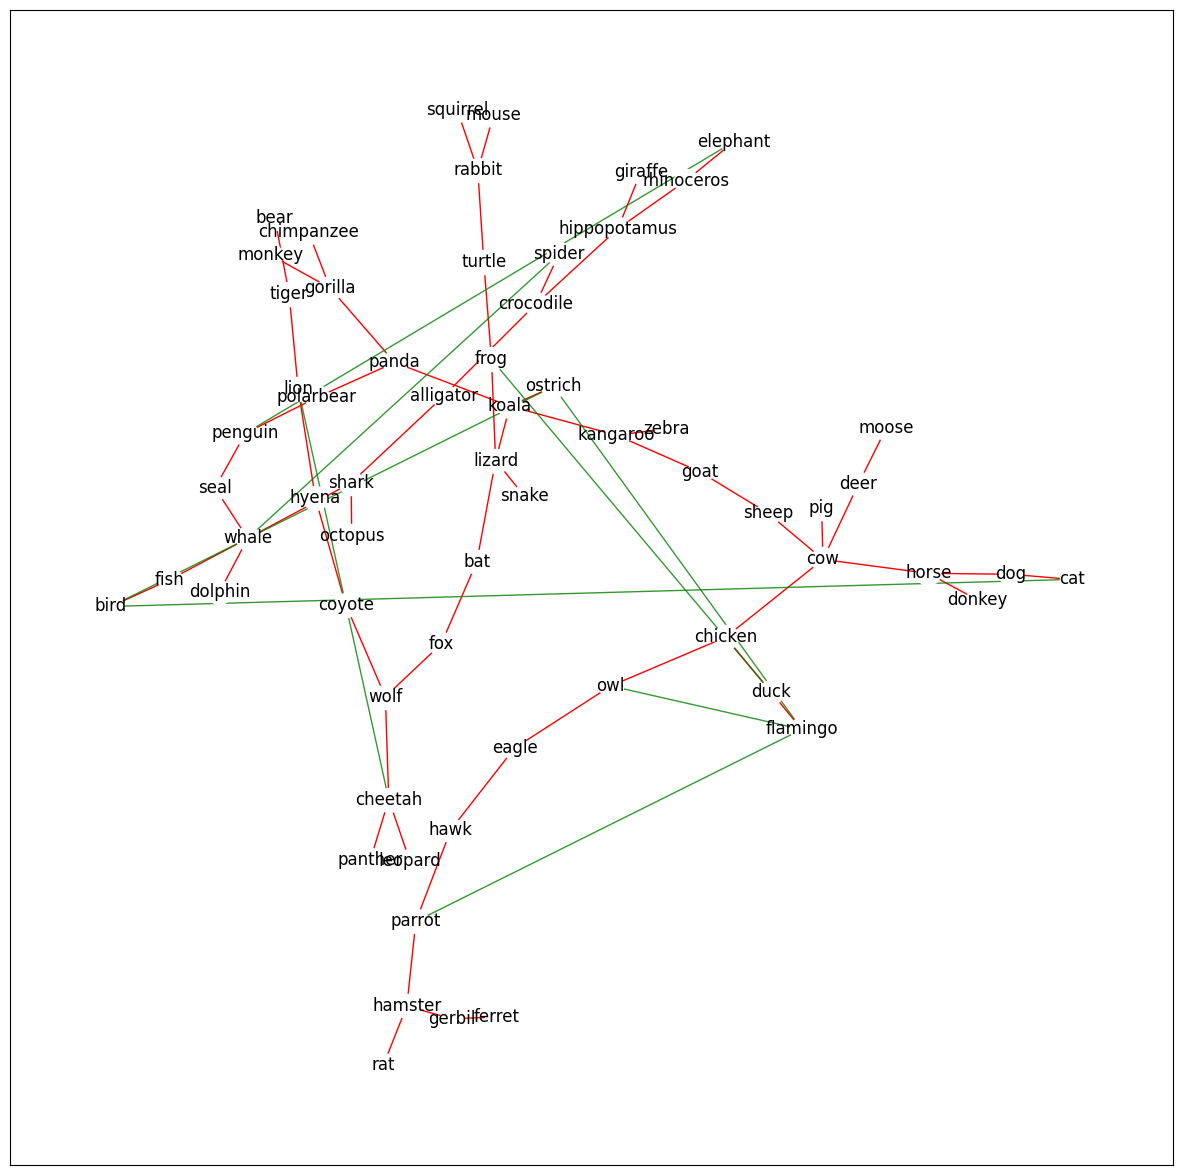

In [230]:
from scipy.sparse.csgraph import minimum_spanning_tree
plt.figure(figsize=(15,15))
Gtree = nx.from_pandas_adjacency(pd.DataFrame(minimum_spanning_tree(-Gvals).todense()<0, index=animals.columns, columns=animals.columns))
pos = nx.spring_layout(Gtree)
nx.draw_networkx(Gtree, pos=pos, node_color='w', edge_color='r')
nx.draw_networkx_edges(nx.difference(G, Gtree), 
    pos=pos, edge_color='g', alpha=0.8,
    connectionstyle="arc3,rad=0.01"  # <-- THIS IS IT
)
# nx.difference()

In [153]:
from netgraph import Graph, InteractiveGraph, EditableGraph
plt.figure(figsize=(10,10))
Graph(
    _sq(min_connected_filter(_sq(Gvals)).filled(0)), 
    node_labels=True, 
    # node_layout='geometric', 
    # node_label_offset=0.05,
    node_size=2,
    directed=False,
)
dict(zip(map(tuple, np.vstack(np.triu_indices_from(Gvals)).T.tolist()), 1-min_connected_filter(_sq(Gvals)).filled(0)))

generalized_graph_dists(edge_mask_to_laplacian(min_connected_filter(_sq(Gvals))))

ModuleNotFoundError: No module named 'netgraph'

In [ ]:
from toolz import sliding_window
# df.query('category=="animals"').groupby(['listnum','item'])['item'].rolling(2).count()
# animals.rolling(2).sum()
(df
 .reset_index(level=1, drop=True)
 .set_index(
    df
    .groupby(level=0)
    .cumcount()
    .rename('tokenid'), 
    append=True
    )['item']
#  .groupby(['item'])['item']
 .rolling(2)
 .apply(str.join(', '))
#  .count()
#  .rolling(2)
#  .count()
#  .unique()
)

TypeError: str.join() takes exactly one argument (0 given)

In [22]:
# ochiai(roll_X)
np.cross(roll_X, roll_X)

ValueError: incompatible dimensions for cross product
(dimension must be 2 or 3)